<a href="https://colab.research.google.com/github/bala-ceg/backtest-strategies/blob/main/weeklyexpiry_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install & Import Necessary Libs

In [1]:
!pip install nsepython

In [2]:
from nsepython import *

## NIFTY OI sample snippet

In [54]:
symbol = "NIFTY"
start_date = "07-06-2024"
end_date ="12-06-2024"
instrumentType = "options"
expiry_date ="13-Jun-2024"
put_df = derivative_history(symbol,start_date,end_date,instrumentType,expiry_date,strikePrice="",optionType="PE")
call_df = derivative_history(symbol,start_date,end_date,instrumentType,expiry_date,strikePrice="",optionType="CE")
if not put_df.empty:
  put_df['FH_OPEN_INT'] = put_df['FH_OPEN_INT'].astype(int)
  put_df['FH_TOT_TRADED_QTY'] = put_df['FH_TOT_TRADED_QTY'].astype(int)
  put_df = put_df.sort_values(by=['FH_OPEN_INT'], ascending=False)
  underlying_value = put_df['FH_UNDERLYING_VALUE'].iloc[0]

if not call_df.empty:
  call_df['FH_OPEN_INT'] = call_df['FH_OPEN_INT'].astype(int)
  call_df['FH_TOT_TRADED_QTY'] = call_df['FH_TOT_TRADED_QTY'].astype(int)
  call_df = call_df.sort_values(by=['FH_OPEN_INT'], ascending=False)
  underlying_value = call_df['FH_UNDERLYING_VALUE'].iloc[0]

In [55]:
put_total_open_int = put_df['FH_OPEN_INT'].sum()
put_total_volume = put_df['FH_TOT_TRADED_QTY'].sum()

put_df['FH_OPEN_INT_PERCENTAGE'] = (put_df['FH_OPEN_INT'] / put_total_open_int) * 100

put_df[['FH_STRIKE_PRICE', 'FH_OPEN_INT','FH_OPEN_INT_PERCENTAGE']].head(5)

,FH_STRIKE_PRICE,FH_OPEN_INT,FH_OPEN_INT_PERCENTAGE
30,23000.00,8672575,11.104410
26,23200.00,6306300,8.074619
40,22000.00,5141825,6.583620
33,22700.00,4899450,6.273281
35,22600.00,4480375,5.736696


In [56]:
put_df['FH_STRIKE_PRICE'] = put_df['FH_STRIKE_PRICE'].astype(float)
put_df['ABS_DIFF'] = abs(put_df['FH_STRIKE_PRICE'] - float(underlying_value))

sorted_put_df = put_df.sort_values(by='ABS_DIFF')

closest_rows = sorted_put_df[['FH_STRIKE_PRICE', 'FH_OPEN_INT','ABS_DIFF','FH_OPEN_INT_PERCENTAGE','FH_TOT_TRADED_QTY']]

print(closest_rows.head(3))
print(underlying_value)
put_df['FH_OPEN_INT'].idxmax()
row_with_max_open_int = put_df.loc[put_df['FH_OPEN_INT'].idxmax()]
row_with_max_open_int['FH_OPEN_INT']
near_strike_put_open_int = closest_rows['FH_OPEN_INT'].head(3).sum()
print(near_strike_put_open_int)
near_strike_put_vol = closest_rows['FH_TOT_TRADED_QTY'].head(3).sum()
print(near_strike_put_vol)

    FH_STRIKE_PRICE  FH_OPEN_INT  ABS_DIFF  FH_OPEN_INT_PERCENTAGE  \
24          23300.0      4479850     22.95                5.736023   
23          23350.0      2018600     27.05                2.584626   
25          23250.0      1960200     72.95                2.509850   

    FH_TOT_TRADED_QTY  
24          146726850  
23           97113150  
25           54860850  
23322.95
8458650
298700850


In [57]:
call_total_open_int = call_df['FH_OPEN_INT'].sum()
call_total_volume = call_df['FH_TOT_TRADED_QTY'].sum()

call_df['FH_OPEN_INT_PERCENTAGE'] = (call_df['FH_OPEN_INT'] / call_total_open_int) * 100

call_df[['FH_STRIKE_PRICE', 'FH_OPEN_INT','FH_OPEN_INT_PERCENTAGE']].head(5)


,FH_STRIKE_PRICE,FH_OPEN_INT,FH_OPEN_INT_PERCENTAGE
15,23800.00,6778900,10.138155
6,24500.00,6096750,9.117968
18,23600.00,5065475,7.575649
16,23700.00,5017825,7.504387
22,23300.00,3894175,5.823917


In [58]:
call_df['FH_STRIKE_PRICE'] = call_df['FH_STRIKE_PRICE'].astype(float)
call_df['ABS_DIFF'] = abs(call_df['FH_STRIKE_PRICE'] - float(underlying_value))

# Sort by the absolute difference
sorted_call_df = call_df.sort_values(by='ABS_DIFF')

# Select the rows that are closest to the underlying value
closest_rows = sorted_call_df[['FH_STRIKE_PRICE', 'FH_OPEN_INT','ABS_DIFF','FH_OPEN_INT_PERCENTAGE','FH_TOT_TRADED_QTY']]

print(closest_rows.head(3))
print(underlying_value)
call_df['FH_OPEN_INT'].idxmax()
row_with_max_open_int = call_df.loc[call_df['FH_OPEN_INT'].idxmax()]
row_with_max_open_int['FH_OPEN_INT']
near_strike_call_open_int = closest_rows['FH_OPEN_INT'].head(3).sum()
print(near_strike_call_open_int)
near_strike_call_vol = closest_rows['FH_TOT_TRADED_QTY'].head(3).sum()
print(near_strike_call_vol)

    FH_STRIKE_PRICE  FH_OPEN_INT  ABS_DIFF  FH_OPEN_INT_PERCENTAGE  \
22          23300.0      3894175     22.95                5.823917   
21          23350.0      2703625     27.05                4.043395   
23          23250.0       803825     72.95                1.202157   

    FH_TOT_TRADED_QTY  
22          104475950  
21          105632000  
23           21820550  
23322.95
7401625
231928500


In [59]:
pcr = float(put_total_open_int/call_total_open_int)
print("PCR OI:",pcr)
pcr_vol = float(put_total_volume/call_total_volume)
print("PCR volume:",pcr_vol)

PCR OI: 1.1680253076244043
PCR volume: 1.346010664870468


In [60]:
near_pcr = float(near_strike_put_open_int/near_strike_call_open_int)
print("Near PCR OI:",near_pcr)
near_pcr_vol = float(near_strike_put_vol/near_strike_call_vol)
print("Near PCR volume:",near_pcr_vol)

Near PCR OI: 1.142809855943796
Near PCR volume: 1.2879005814291904


In [10]:
call_df[['FH_STRIKE_PRICE', 'FH_OPEN_INT','ABS_DIFF','FH_OPEN_INT_PERCENTAGE']].head(15)

,FH_STRIKE_PRICE,FH_OPEN_INT,ABS_DIFF,FH_OPEN_INT_PERCENTAGE
33,18500.0,10167250,457.05,15.441727
35,18400.0,8922800,357.05,13.551692
36,18350.0,6805600,307.05,10.336150
32,18600.0,6217400,557.05,9.442808
24,19200.0,5026650,1157.05,7.634332
26,19000.0,4801300,957.05,7.292076
30,18700.0,4351600,657.05,6.609085
29,18800.0,3797800,757.05,5.767989
34,18450.0,3643900,407.05,5.534251
37,18000.0,2681400,42.95,4.072433


In [11]:
call_df[['FH_STRIKE_PRICE', 'FH_OPEN_INT']]

,FH_STRIKE_PRICE,FH_OPEN_INT
33,18500.0,10167250
35,18400.0,8922800
36,18350.0,6805600
32,18600.0,6217400
24,19200.0,5026650
...,...,...
56,16400.0,0
55,16450.0,0
53,16600.0,0
48,17150.0,0


In [12]:
import pandas as pd
historic_nifty_df = pd.read_csv('/content/Nifty50_5Ydata.csv')
historic_nifty_df['Date'] = pd.to_datetime(historic_nifty_df['Date'], format="%d-%m-%Y")
numeric_columns = ["Open", "High", "Low", "Price"]
for column in numeric_columns:
    historic_nifty_df[column] = historic_nifty_df[column].str.replace(",", "").astype(float)
historic_nifty_df['Change %'] = historic_nifty_df['Change %'].str.replace("%", "").astype(float)
historic_nifty_df

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-06-20,23567.00,23586.15,23624.00,23442.60,280.34B,0.22
1,2024-06-19,23516.00,23629.85,23664.00,23412.90,328.81B,-0.18
2,2024-06-18,23557.90,23570.80,23579.05,23499.70,272.21B,0.39
3,2024-06-14,23465.60,23464.95,23490.40,23334.25,223.09B,0.29
4,2024-06-13,23398.90,23480.95,23481.05,23353.90,268.28B,0.33
...,...,...,...,...,...,...,...
1290,2019-04-04,11598.00,11660.20,11662.55,11559.20,349.03B,-0.39
1291,2019-04-03,11643.95,11735.30,11761.00,11629.15,365.76B,-0.59
1292,2019-04-02,11713.20,11711.55,11729.35,11655.85,386.13B,0.38
1293,2019-04-01,11669.15,11665.20,11738.10,11644.75,379.57B,0.39


In [13]:
data = historic_nifty_df.copy()
data['Day_of_Week'] = data['Date'].dt.dayofweek
data = data[['Date', 'Price', 'Day_of_Week','Change %']]
data['Week_Number'] = data['Date'].dt.isocalendar().week
data['Year'] = data['Date'].dt.isocalendar().year

day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'}
data['Day_of_Week'] = data['Day_of_Week'].map(day_map)

pivoted_data_1 = data.pivot_table(index=['Year', 'Week_Number'], columns='Day_of_Week', values='Price')
pivoted_data_2 = data.pivot_table(index=['Year', 'Week_Number'], columns='Day_of_Week', values='Change %')

In [41]:
import pandas as pd
from datetime import timedelta


start_date = pd.to_datetime("29-03-2019", format="%d-%m-%Y")
end_date = pd.to_datetime("20-06-2024", format="%d-%m-%Y")

start_list = []
end_list = []
target_list = []
years = []
week_numbers = []



current_date = start_date
while current_date <= end_date:
    if current_date.weekday() == 4:
        start_list.append(current_date.strftime("%d-%m-%Y"))
    if current_date.weekday() == 3:
        end_list.append(current_date.strftime("%d-%b-%Y"))
        years.append(current_date.isocalendar().year)
        week_numbers.append(current_date.isocalendar().week)
    if current_date.weekday() == 2:
        try :
          historic_nifty_df[historic_nifty_df['Date'] == current_date.strftime("%d-%m-%Y") ]['Price'].iloc[0]
          target_list.append(current_date.strftime("%d-%m-%Y"))
        except:
          previous_date = current_date - timedelta(days=1)
          target_list.append(previous_date.strftime("%d-%m-%Y"))

    current_date += timedelta(days=1)

print("Start List (Fridays):", start_list)
print("End List (Thursdays):", end_list)
print("Target List (Wednesdays):", target_list)
print(years)
print(week_numbers)

Start List (Fridays): ['29-03-2019', '05-04-2019', '12-04-2019', '19-04-2019', '26-04-2019', '03-05-2019', '10-05-2019', '17-05-2019', '24-05-2019', '31-05-2019', '07-06-2019', '14-06-2019', '21-06-2019', '28-06-2019', '05-07-2019', '12-07-2019', '19-07-2019', '26-07-2019', '02-08-2019', '09-08-2019', '16-08-2019', '23-08-2019', '30-08-2019', '06-09-2019', '13-09-2019', '20-09-2019', '27-09-2019', '04-10-2019', '11-10-2019', '18-10-2019', '25-10-2019', '01-11-2019', '08-11-2019', '15-11-2019', '22-11-2019', '29-11-2019', '06-12-2019', '13-12-2019', '20-12-2019', '27-12-2019', '03-01-2020', '10-01-2020', '17-01-2020', '24-01-2020', '31-01-2020', '07-02-2020', '14-02-2020', '21-02-2020', '28-02-2020', '06-03-2020', '13-03-2020', '20-03-2020', '27-03-2020', '03-04-2020', '10-04-2020', '17-04-2020', '24-04-2020', '01-05-2020', '08-05-2020', '15-05-2020', '22-05-2020', '29-05-2020', '05-06-2020', '12-06-2020', '19-06-2020', '26-06-2020', '03-07-2020', '10-07-2020', '17-07-2020', '24-07-2020

In [49]:
pcr_data_df = pd.DataFrame(columns=['Year', 'Week_Number', 'pcr', 'pcr_vol', 'near_pcr',  'near_pcr_vol'])
#pcr_data_df = pd.DataFrame()

for start_date, target_date, end_date,year,week_num in zip(start_list, target_list, end_list,years,week_numbers):
      symbol = "NIFTY"
      instrumentType = "options"
      print(start_date, target_date, end_date,year,week_num)
      put_df = derivative_history(symbol,start_date,target_date,instrumentType,end_date,strikePrice="",optionType="PE")
      call_df = derivative_history(symbol,start_date,target_date,instrumentType,end_date,strikePrice="",optionType="CE")
      try:
          underlying_value = put_df['FH_UNDERLYING_VALUE'].iloc[0]
          print(underlying_value)

          if not put_df.empty:
            put_df['FH_OPEN_INT'] = put_df['FH_OPEN_INT'].astype(int)
            put_df['FH_TOT_TRADED_QTY'] = put_df['FH_TOT_TRADED_QTY'].astype(int)
            put_df = put_df.sort_values(by=['FH_OPEN_INT'], ascending=False)
            put_total_open_int = put_df['FH_OPEN_INT'].sum()
            put_total_volume = put_df['FH_TOT_TRADED_QTY'].sum()
            put_df['FH_OPEN_INT_PERCENTAGE'] = (put_df['FH_OPEN_INT'] / put_total_open_int) * 100
            put_df['FH_STRIKE_PRICE'] = put_df['FH_STRIKE_PRICE'].astype(float)
            put_df['ABS_DIFF'] = abs(put_df['FH_STRIKE_PRICE'] - float(underlying_value))

            sorted_put_df = put_df.sort_values(by='ABS_DIFF')

            closest_rows = sorted_put_df[['FH_STRIKE_PRICE', 'FH_OPEN_INT','ABS_DIFF','FH_OPEN_INT_PERCENTAGE','FH_TOT_TRADED_QTY']]
            put_df['FH_OPEN_INT'].idxmax()
            row_with_max_open_int = put_df.loc[put_df['FH_OPEN_INT'].idxmax()]
            row_with_max_open_int['FH_OPEN_INT']
            near_strike_put_open_int = closest_rows['FH_OPEN_INT'].head(3).sum()
            near_strike_put_vol = closest_rows['FH_TOT_TRADED_QTY'].head(3).sum()

          if not call_df.empty:
            call_df['FH_OPEN_INT'] = call_df['FH_OPEN_INT'].astype(int)
            call_df['FH_TOT_TRADED_QTY'] = call_df['FH_TOT_TRADED_QTY'].astype(int)
            call_df = call_df.sort_values(by=['FH_OPEN_INT'], ascending=False)
            call_total_open_int = call_df['FH_OPEN_INT'].sum()
            call_total_volume = call_df['FH_TOT_TRADED_QTY'].sum()

            call_df['FH_OPEN_INT_PERCENTAGE'] = (call_df['FH_OPEN_INT'] / call_total_open_int) * 100
            call_df['FH_STRIKE_PRICE'] = call_df['FH_STRIKE_PRICE'].astype(float)
            call_df['ABS_DIFF'] = abs(call_df['FH_STRIKE_PRICE'] - float(underlying_value))

            sorted_call_df = call_df.sort_values(by='ABS_DIFF')
            closest_rows = sorted_call_df[['FH_STRIKE_PRICE', 'FH_OPEN_INT','ABS_DIFF','FH_OPEN_INT_PERCENTAGE','FH_TOT_TRADED_QTY']]

            call_df['FH_OPEN_INT'].idxmax()
            row_with_max_open_int = call_df.loc[call_df['FH_OPEN_INT'].idxmax()]
            row_with_max_open_int['FH_OPEN_INT']
            near_strike_call_open_int = closest_rows['FH_OPEN_INT'].head(3).sum()
            near_strike_call_vol = closest_rows['FH_TOT_TRADED_QTY'].head(3).sum()

          if not put_df.empty and not call_df.empty:
            pcr = float(put_total_open_int/call_total_open_int)
            pcr_vol = float(put_total_volume/call_total_volume)
            near_pcr = float(near_strike_put_open_int/near_strike_call_open_int)
            near_pcr = float(near_strike_put_vol/near_strike_call_vol)
            new_data = {'Year': year,'Week_Number': week_num,'pcr': pcr,'pcr_vol': pcr_vol,'near_pcr': near_pcr,'near_pcr_vol': near_pcr_vol}
            print(new_data)
            pcr_data_df = pd.concat([pcr_data_df, pd.DataFrame([new_data])], ignore_index=True)
          # else:
          #   new_data = {'Year': year,'Week_Number': week_num,'pcr': None,'pcr_vol': None,'near_pcr': None,'near_pcr_vol': None}
          #   pcr_data_df = pd.concat([pcr_data_df, pd.DataFrame([new_data])], ignore_index=True)
      except:
          print("error occured")



29-03-2019 02-04-2019 04-Apr-2019 2019 14
{'data': [{'_id': '642c2ad9e2684b2e010bee2c', 'FH_INSTRUMENT': 'OPTIDX', 'FH_SYMBOL': 'NIFTY', 'FH_EXPIRY_DT': '04-Apr-2019', 'FH_STRIKE_PRICE': '9100', 'FH_OPTION_TYPE': 'PE', 'FH_MARKET_TYPE': 'N', 'FH_OPENING_PRICE': '.8', 'FH_TRADE_HIGH_PRICE': '.8', 'FH_TRADE_LOW_PRICE': '.05', 'FH_CLOSING_PRICE': '.05', 'FH_LAST_TRADED_PRICE': '.05', 'FH_PREV_CLS': '.3', 'FH_SETTLE_PRICE': '.05', 'FH_TOT_TRADED_QTY': '450', 'FH_TOT_TRADED_VAL': '4095153.75', 'FH_OPEN_INT': '525', 'FH_CHANGE_IN_OI': '0', 'FH_MARKET_LOT': '75', 'FH_TIMESTAMP': '02-Apr-2019', 'FH_UNDERLYING_VALUE': '11713.2', 'TIMESTAMP': '2019-04-01T18:30:00.000Z', 'CALCULATED_PREMIUM_VAL': 153.75}, {'_id': '642c2ad9e2684b2e010bee30', 'FH_INSTRUMENT': 'OPTIDX', 'FH_SYMBOL': 'NIFTY', 'FH_EXPIRY_DT': '04-Apr-2019', 'FH_STRIKE_PRICE': '9150', 'FH_OPTION_TYPE': 'PE', 'FH_MARKET_TYPE': 'N', 'FH_OPENING_PRICE': '0', 'FH_TRADE_HIGH_PRICE': '0', 'FH_TRADE_LOW_PRICE': '0', 'FH_CLOSING_PRICE': '.05',

In [50]:
pcr_data_df

,Year,Week_Number,pcr,pcr_vol,near_pcr,near_pcr_vol
0,2019,14,1.170834,0.862793,0.794347,7.701901
1,2019,15,0.692563,0.823201,1.661440,7.701901
2,2019,16,1.632566,1.054964,0.688205,7.701901
3,2019,17,1.457176,0.893068,0.275643,7.701901
4,2019,19,0.318369,0.672301,2.741546,7.701901
...,...,...,...,...,...,...
255,2024,21,1.100094,0.835847,0.528212,7.701901
256,2024,22,0.704400,1.171862,1.426766,7.701901
257,2024,23,0.535708,0.551546,0.241626,7.701901
258,2024,24,0.723595,0.697100,0.528594,7.701901


In [34]:
pivoted_data_1.columns.name = None
pivoted_data_1.reset_index(inplace=True)


pivoted_data_2.columns.name = None
pivoted_data_2.reset_index(inplace=True)

pivoted_data_1['Friday'] = pivoted_data_1['Friday'].shift(1)

pivoted_data_1 = pivoted_data_1[['Year','Week_Number', 'Friday', 'Monday', 'Tuesday',  'Wednesday','Thursday']]
pivoted_data_1 = pivoted_data_1.dropna(thresh=pivoted_data_1.shape[1] - 5 + 1)
pivoted_data_1['Thursday'].fillna(pivoted_data_1['Wednesday'], inplace=True)

pivoted_data_2['Friday'] = pivoted_data_2['Friday'].shift(1)

pivoted_data_2 = pivoted_data_2[['Year','Week_Number', 'Friday', 'Monday', 'Tuesday',  'Wednesday','Thursday']]
pivoted_data_2 = pivoted_data_2.dropna(thresh=pivoted_data_2.shape[1] - 5 + 1)
pivoted_data_2['Thursday'].fillna(pivoted_data_2['Wednesday'], inplace=True)

In [51]:
pivoted_data_2

,Year,Week_Number,Friday,Monday,Tuesday,Wednesday,Thursday,Year_Week
1,2019,14,0.47,0.39,0.38,-0.59,-0.39,2019_14
2,2019,15,0.59,-0.53,0.58,-0.75,0.11,2019_15
3,2019,16,0.40,0.40,0.83,NaN,-0.29,2019_16
4,2019,17,NaN,-1.35,-0.16,1.30,-0.72,2019_17
5,2019,18,0.97,NaN,-0.06,NaN,-0.20,2019_18
...,...,...,...,...,...,...,...,...
269,2024,21,0.28,NaN,0.12,0.31,1.64,2024_21
270,2024,22,-0.05,-0.11,-0.19,-0.80,-0.95,2024_22
271,2024,23,0.19,3.25,-5.93,3.36,0.89,2024_23
272,2024,24,2.05,-0.13,0.02,0.25,0.33,2024_24


In [36]:
pivoted_data_2['Year_Week'] = pivoted_data_2['Year'].astype(str) + '_' + pivoted_data_2['Week_Number'].astype(str)
#pivoted_data_3 = pivoted_data_2[pivoted_data_2['Year'] == 2024]
pivoted_data_3 = pivoted_data_2
print(len(pivoted_data_3))
len(pivoted_data_3[(pivoted_data_3['Thursday'] < 0.5) & (pivoted_data_3['Thursday'] > -0.5)])

273


120

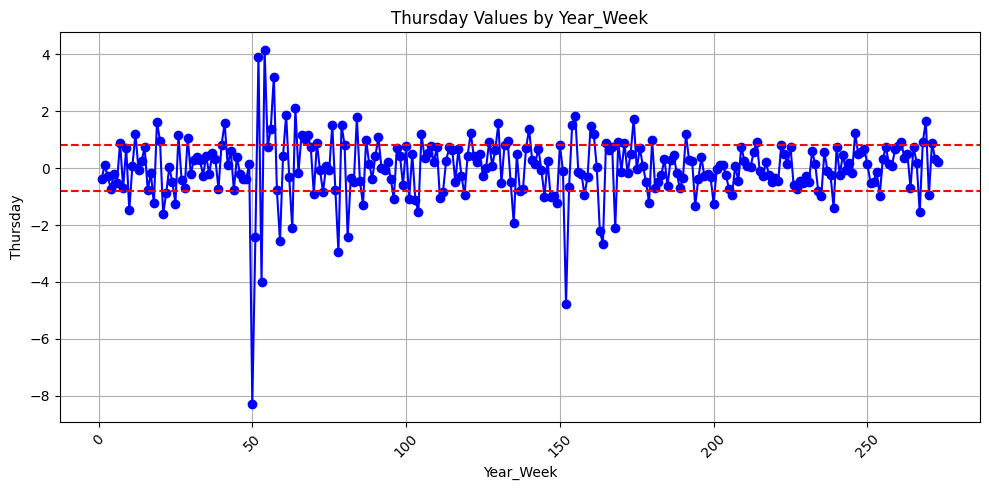

In [37]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(pivoted_data_3['Thursday'], marker='o', linestyle='-', color='b')
plt.xlabel('Year_Week')
plt.ylabel('Thursday')
plt.title('Thursday Values by Year_Week')
plt.xticks(rotation=45)
plt.grid(True)
plt.axhline(y=0.8, color='red', linestyle='--')
plt.axhline(y=-0.8, color='red', linestyle='--')
plt.tight_layout()
plt.show()

In [38]:
import pandas as pd
historic_vix_df = pd.read_csv('/content/IndiaVIX_5Ydata.csv')
print(historic_vix_df.head(5))
historic_vix_df['Change %'] = historic_vix_df['Change %'].str.replace("%", "").astype(float)
historic_vix_df = historic_vix_df.rename(columns={'Change %': 'vix_change', 'Price': 'vix_close','Date ': 'Date'})
historic_vix_df = historic_vix_df[['Date', 'vix_change', 'vix_close']]
historic_vix_df.describe()

         Date    Price     Open     High      Low  Vol. Change %
0  20-06-2024  13.3450  13.7125  14.0600  13.1025   NaN   -2.68%
1  19-06-2024  13.7125  12.9650  13.8150  11.6300   NaN    5.77%
2  18-06-2024  12.9650  12.8225  13.4200  12.6250   NaN    1.11%
3  14-06-2024  12.8225  13.4875  13.4875  12.6550   NaN   -4.93%
4  13-06-2024  13.4875  14.3875  14.3875  13.3125   NaN   -6.26%


,vix_change,vix_close
count,1293.000000,1293.000000
mean,0.127657,18.456154
std,5.457904,7.995114
min,-29.770000,10.135000
25%,-2.790000,13.622500
50%,-0.390000,16.647500
75%,2.340000,20.845000
max,30.790000,83.607500
